In [32]:
# Copyright (c) Microsoft Corporation. 
# Licensed under the MIT license.
"""
The code for creating the dataset from T-REx for pre-training factual adapter on relation classification task.

Input：cleaned T_Rex dataset. "T_REx_example.json"
Output：examples: {tokens, obj_label(relation label), entity [subj_strat,subj_end]}

- Whole dataset   "T_REx_examples_{}_{}.json".format(max_count,min_predicate_num)
- Training split   data/train.json
- Dev split    data/dev.json
- labels    data/relations.json

example：
{'docid': 'Q3343462',
 'token': ['Nora','Zaïdi','(','Nora','Mebrak','-','Zaïdi','),','born','on','July','6',',','1965','in','Bethoncourt','(','French','département','of',
  'Doubs','),','daughter','of','an','Algerian','textile','toiler',',','is','a','French','activist','who','seated','in','the','European','Parliament','from',
  '1989','to','1994','.'],
  'relation': 'P31',
  'subj_start': 20,
  'subj_end': 20,
  'obj_start': 18,
  'obj_end': 18,
  'subj_label': 'Q3361',
  'obj_label': 'Q6465'}
"""

import json
!pip install matplotlib
import matplotlib.pyplot as plt
import os

You should consider upgrading via the '/Users/olivierrousseau/Library/Caches/pypoetry/virtualenvs/k-adapter-yjoD7LG2-py3.8/bin/python -m pip install --upgrade pip' command.


In [33]:
def get_property2idx_dict(file="data/cleaned_T_REx/T_REx_pred2ic.json"):
    with open(file, "r") as fin:
        property2idx_dict = json.load(fin)
    return property2idx_dict
# property dictionary.
property2idx_dict = get_property2idx_dict()
idx2property_dict = {v: k for k, v in property2idx_dict.items()}

print(len(property2idx_dict.keys()))

401


In [34]:
property2idx_dict

{'P31': 0,
 'P47': 1,
 'P361': 2,
 'P30': 3,
 'P17': 4,
 'P37': 5,
 'P279': 6,
 'P1412': 7,
 'P106': 8,
 'P108': 9,
 'P569': 10,
 'P103': 11,
 'P156': 12,
 'P50': 13,
 'P800': 14,
 'P138': 15,
 'P737': 16,
 'P527': 17,
 'P136': 18,
 'P577': 19,
 'P607': 20,
 'P135': 21,
 'P530': 22,
 'P6': 23,
 'P35': 24,
 'P27': 25,
 'P22': 26,
 'P25': 27,
 'P3373': 28,
 'P40': 29,
 'P134': 30,
 'P460': 31,
 'P451': 32,
 'P407': 33,
 'P364': 34,
 'P674': 35,
 'P706': 36,
 'P2596': 37,
 'P1066': 38,
 'P802': 39,
 'P2341': 40,
 'P1889': 41,
 'P1191': 42,
 'P1419': 43,
 'P1049': 44,
 'P26': 45,
 'P463': 46,
 'P205': 47,
 'P206': 48,
 'P1336': 49,
 'P155': 50,
 'P1366': 51,
 'P1365': 52,
 'P112': 53,
 'P1001': 54,
 'P1906': 55,
 'P425': 56,
 'P69': 57,
 'P840': 58,
 'P291': 59,
 'P20': 60,
 'P1411': 61,
 'P570': 62,
 'P131': 63,
 'P57': 64,
 'P58': 65,
 'P162': 66,
 'P1542': 67,
 'P828': 68,
 'P171': 69,
 'P19': 70,
 'P551': 71,
 'P765': 72,
 'P641': 73,
 'P144': 74,
 'P461': 75,
 'P105': 76,
 'P710': 77,

In [35]:
def load_examples(file):
    with open(file, "r") as fin:
        all_examples = json.load(fin)
    print("total examples：", len(all_examples))
    return all_examples
examples = load_examples(file="data/cleaned_T_REx/T_REx_example.json")


total examples： 77825


In [36]:
example = examples[0]
print(example)
subj_start_id = example["subj_start"]
subj_end_id = example["subj_end"]
example["token"][subj_start_id:subj_end_id+1]

{'docid': 'Q33199', 'token': ['The', 'Austroasiatic', 'languages', ',', 'in', 'recent', 'classifications', 'synonymous', 'with', 'Mon', '–', 'Khmer', ',', 'are', 'a', 'large', 'language', 'family', 'of', 'continental', 'Southeast', 'Asia', ',', 'also', 'scattered', 'throughout', 'India', ',', 'Bangladesh', ',', 'Nepal', 'and', 'the', 'southern', 'border', 'of', 'China', '.'], 'relation': 0, 'subj_start': 1, 'subj_end': 2, 'obj_start': 16, 'obj_end': 17, 'subj_label': 'Q33199', 'obj_label': 'Q25295'}


['Austroasiatic', 'languages']

In [37]:
for i in range(len(examples)):
    relation = examples[i]["relation"]
    prop = idx2property_dict[relation]
    examples[i]["relation"] = prop

In [38]:
examples[0]

{'docid': 'Q33199',
 'token': ['The',
  'Austroasiatic',
  'languages',
  ',',
  'in',
  'recent',
  'classifications',
  'synonymous',
  'with',
  'Mon',
  '–',
  'Khmer',
  ',',
  'are',
  'a',
  'large',
  'language',
  'family',
  'of',
  'continental',
  'Southeast',
  'Asia',
  ',',
  'also',
  'scattered',
  'throughout',
  'India',
  ',',
  'Bangladesh',
  ',',
  'Nepal',
  'and',
  'the',
  'southern',
  'border',
  'of',
  'China',
  '.'],
 'relation': 'P31',
 'subj_start': 1,
 'subj_end': 2,
 'obj_start': 16,
 'obj_end': 17,
 'subj_label': 'Q33199',
 'obj_label': 'Q25295'}

In [39]:
sub_examples = examples
examples_fpre = {}
for i, example in enumerate(sub_examples):
    if example['relation'] in examples_fpre.keys():
        temp = examples_fpre[example['relation']]
        temp.append(example)
        examples_fpre[example['relation']]= temp
    else:
        examples_fpre[example['relation']]= [example]


In [40]:
from collections import Counter
count_list = []
label_list = []
total_predicates_uri = {}
for key in examples_fpre.keys():
    total_predicates_uri[key] = len(examples_fpre[key])

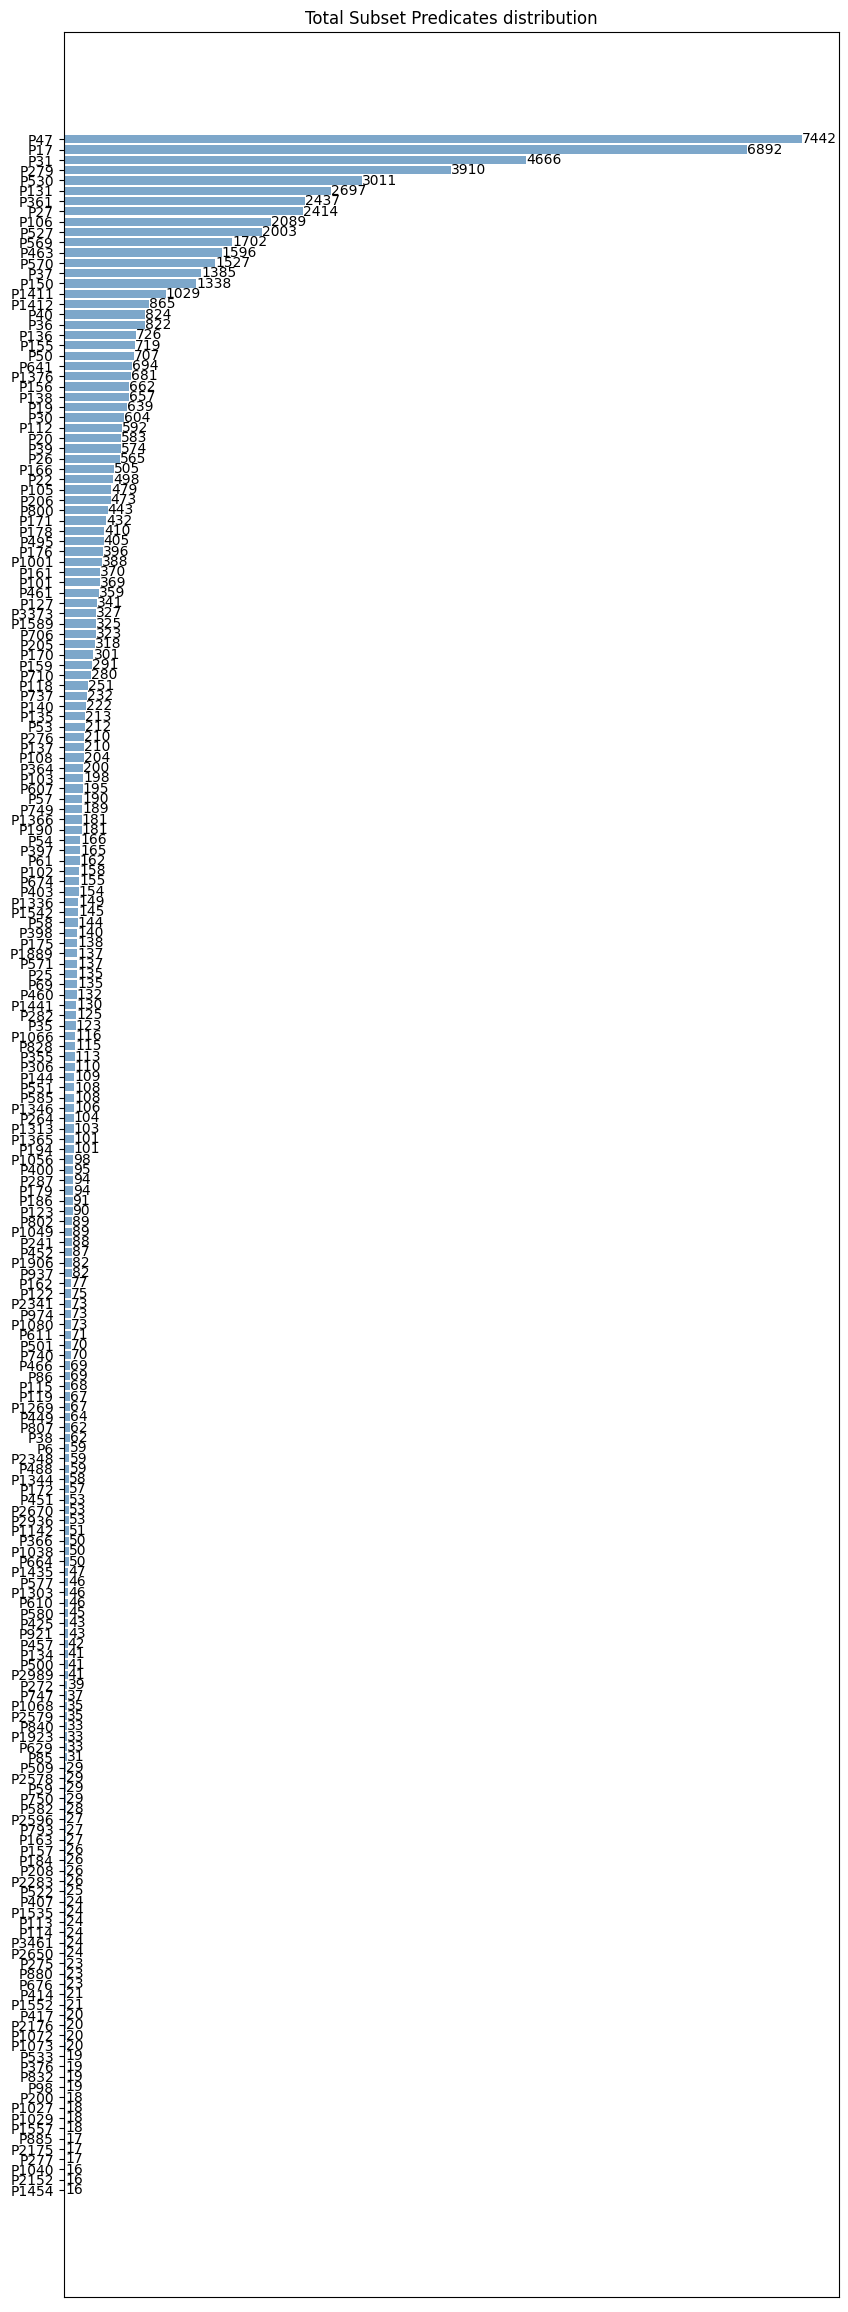

In [41]:
# counting
counter_predicates_uri = Counter(total_predicates_uri)
sort_counter_predicates_uri = counter_predicates_uri.most_common(200)
labels, values = zip(*sort_counter_predicates_uri)

my_labels = list(labels)
my_labels.reverse()
my_values = list(values)
my_values.reverse()

fig, ax = plt.subplots(figsize=(10, 30),dpi=100)
b = ax.barh(range(len(my_labels)), my_values,height=0.8, color='steelblue',alpha=0.7) 
for rect in b:   
    w = rect.get_width()    
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' % 
            int(w), ha='left', va='center')

ax.set_yticks(range(len(my_labels)))
ax.set_yticklabels(my_labels)

plt.xticks(()) 
plt.title('Total Subset Predicates distribution', loc='center')
plt.savefig('total_subset_predicates_dis.png')
plt.show()



In [42]:
# del P31 (instance of)
del examples_fpre['P31']

In [43]:
sub_examples = examples_fpre

In [44]:
# del some relations
total_examples = 0
min_predicate_num = 50
count = 0
discard_list = []
for key in sub_examples.keys():
    if len(sub_examples[key])<min_predicate_num:
        discard_list.append(key)
        count+=1
    else:
        total_examples+=len(sub_examples[key])
for key in discard_list:
    del sub_examples[key]
    
print('the number of relations which have examples less than {} is {} '.format(min_predicate_num,count))
print('the remaining relations:',len(sub_examples.keys())-count)
print("total examples：", total_examples)

the number of relations which have examples less than 50 is 262 
the remaining relations: -124
total examples： 70372


In [45]:
counter_predicates_uri.most_common()

[('P47', 7442),
 ('P17', 6892),
 ('P31', 4666),
 ('P279', 3910),
 ('P530', 3011),
 ('P131', 2697),
 ('P361', 2437),
 ('P27', 2414),
 ('P106', 2089),
 ('P527', 2003),
 ('P569', 1702),
 ('P463', 1596),
 ('P570', 1527),
 ('P37', 1385),
 ('P150', 1338),
 ('P1411', 1029),
 ('P1412', 865),
 ('P40', 824),
 ('P36', 822),
 ('P136', 726),
 ('P155', 719),
 ('P50', 707),
 ('P641', 694),
 ('P1376', 681),
 ('P156', 662),
 ('P138', 657),
 ('P19', 639),
 ('P30', 604),
 ('P112', 592),
 ('P20', 583),
 ('P39', 574),
 ('P26', 565),
 ('P166', 505),
 ('P22', 498),
 ('P105', 479),
 ('P206', 473),
 ('P800', 443),
 ('P171', 432),
 ('P178', 410),
 ('P495', 405),
 ('P176', 396),
 ('P1001', 388),
 ('P161', 370),
 ('P101', 369),
 ('P461', 359),
 ('P127', 341),
 ('P3373', 327),
 ('P1589', 325),
 ('P706', 323),
 ('P205', 318),
 ('P170', 301),
 ('P159', 291),
 ('P710', 280),
 ('P118', 251),
 ('P737', 232),
 ('P140', 222),
 ('P135', 213),
 ('P53', 212),
 ('P276', 210),
 ('P137', 210),
 ('P108', 204),
 ('P364', 200),
 

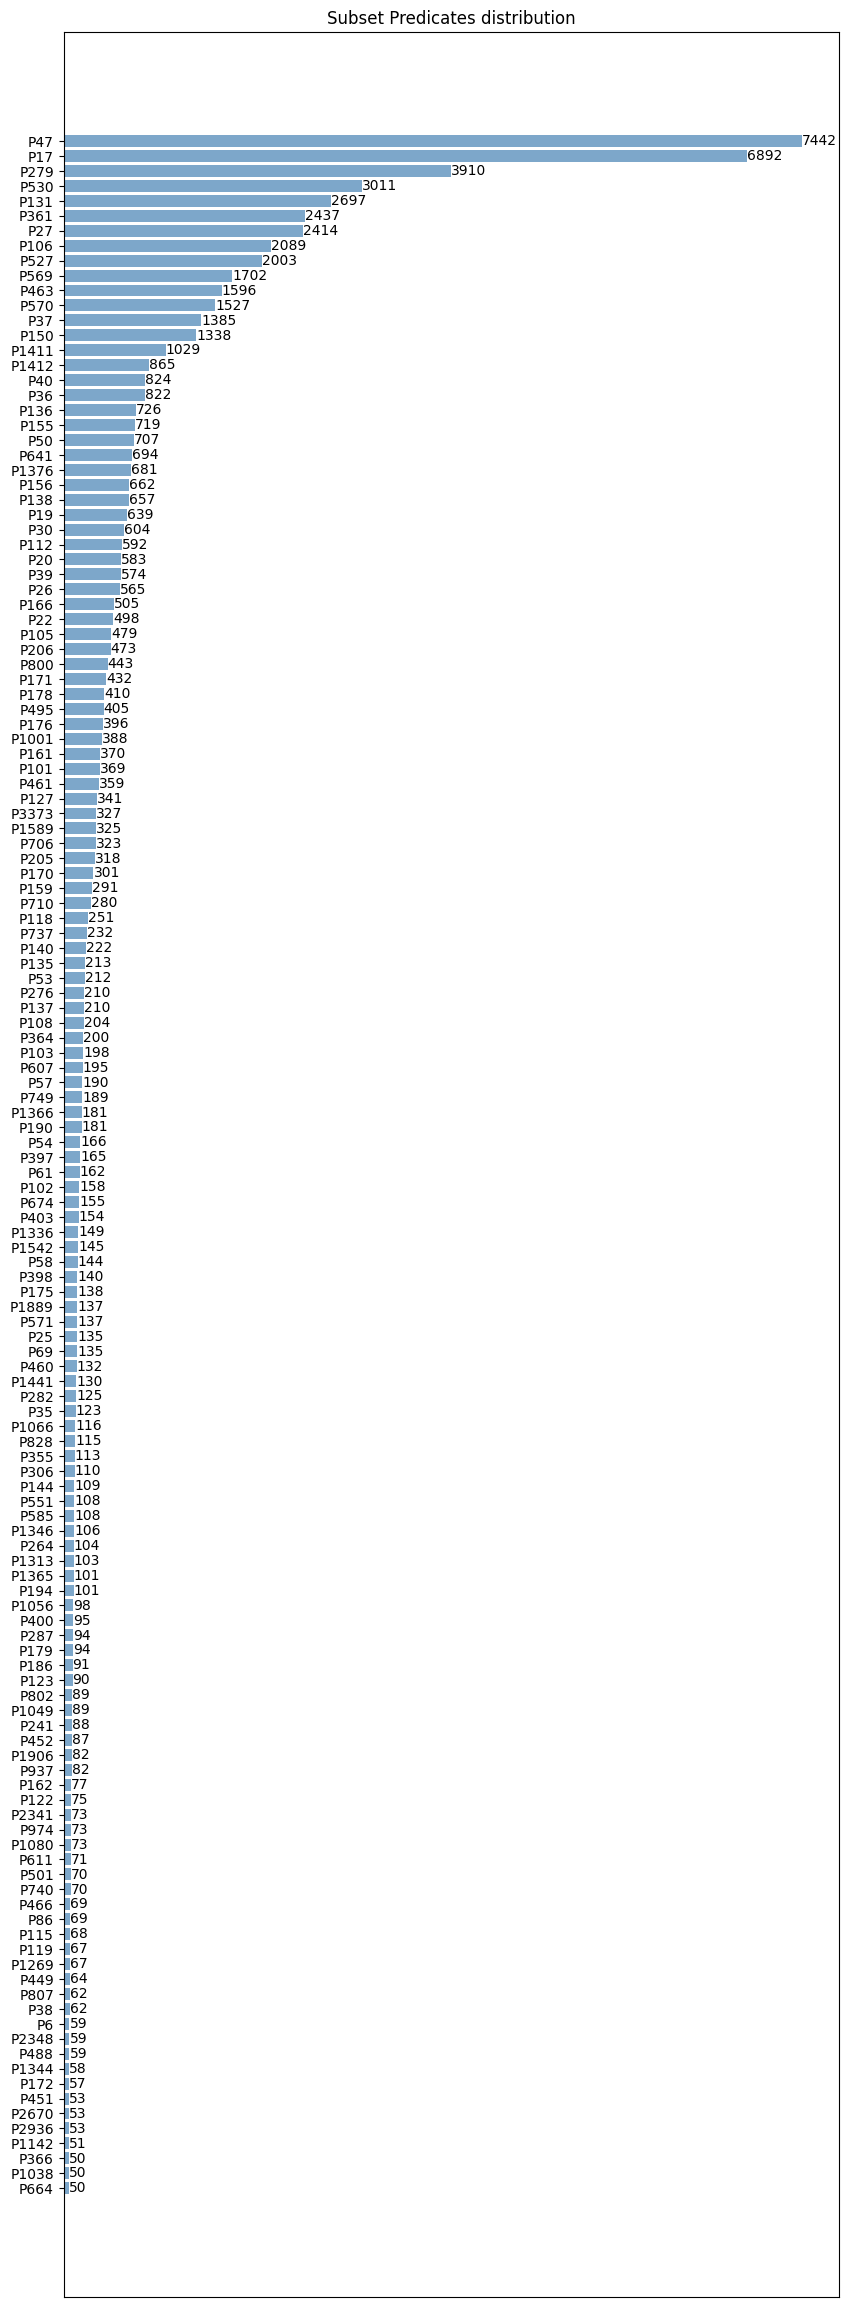

In [46]:
# counting
from collections import Counter

count_list = []
label_list = []
total_predicates_uri = {}
for key in sub_examples.keys():
    total_predicates_uri[key] = len(sub_examples[key])

counter_predicates_uri = Counter(total_predicates_uri)
sort_counter_predicates_uri = counter_predicates_uri.most_common(200)
# labels, values = zip(*counter_relations.items())
labels, values = zip(*sort_counter_predicates_uri)

my_labels = list(labels)
my_labels.reverse()
my_values = list(values)
my_values.reverse()

fig, ax = plt.subplots(figsize=(10, 30),dpi=100)
b = ax.barh(range(len(my_labels)), my_values,height=0.8, color='steelblue',alpha=0.7)
for rect in b:   
    w = rect.get_width()    
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' % 
            int(w), ha='left', va='center')

ax.set_yticks(range(len(my_labels)))
ax.set_yticklabels(my_labels)

plt.xticks(()) 
plt.title('Subset Predicates distribution', loc='center')
plt.savefig('subset_predicates_dis.png')
plt.show()


In [47]:
examples = []
for key in sub_examples.keys():
    examples.extend(sub_examples[key])
print(len(examples))
print(len(sub_examples.keys()))

70372
138


In [48]:
pred2id = {}
for example in examples:
    if example["relation"] in pred2id:
        continue
    else:
        pred2id[example["relation"]] = len(pred2id)

In [49]:
import random
random.shuffle(examples)
train_examples = examples[:int(len(examples) * 0.9)]
val_examples = examples[int(len(examples)*0.9):]

In [50]:
# saving
save_path = "data/trex-rc"
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
fout_pred2id = open(os.path.join(save_path,"relations.json"), "w")
fout_train = open(os.path.join(save_path,"train.json"), "w")
fout_val = open(os.path.join(save_path,"dev.json"), "w")

json.dump(pred2id, fout_pred2id)
json.dump(train_examples, fout_train)
json.dump(val_examples, fout_val)

fout_pred2id.close()
fout_train.close()
fout_val.close()

In [51]:
relations = load_examples(file="data/trex-rc/relations.json")

total examples： 138


In [52]:
relations.keys()

dict_keys(['P47', 'P361', 'P30', 'P17', 'P37', 'P279', 'P1412', 'P106', 'P108', 'P569', 'P103', 'P156', 'P50', 'P800', 'P138', 'P737', 'P527', 'P136', 'P607', 'P135', 'P530', 'P6', 'P35', 'P27', 'P22', 'P25', 'P3373', 'P40', 'P460', 'P451', 'P364', 'P674', 'P706', 'P1066', 'P802', 'P2341', 'P1889', 'P1049', 'P26', 'P463', 'P205', 'P206', 'P1336', 'P155', 'P1366', 'P1365', 'P112', 'P1001', 'P1906', 'P69', 'P20', 'P1411', 'P570', 'P131', 'P57', 'P58', 'P162', 'P1542', 'P828', 'P171', 'P19', 'P551', 'P641', 'P144', 'P461', 'P105', 'P710', 'P102', 'P1589', 'P150', 'P495', 'P39', 'P1313', 'P159', 'P807', 'P36', 'P1376', 'P403', 'P241', 'P61', 'P122', 'P276', 'P749', 'P101', 'P166', 'P170', 'P172', 'P585', 'P366', 'P53', 'P119', 'P398', 'P397', 'P176', 'P178', 'P127', 'P355', 'P571', 'P137', 'P306', 'P1346', 'P1344', 'P161', 'P140', 'P123', 'P2670', 'P282', 'P1441', 'P974', 'P937', 'P501', 'P2936', 'P2348', 'P1269', 'P488', 'P264', 'P186', 'P194', 'P287', 'P179', 'P1038', 'P190', 'P1142', 'P